<a href="https://colab.research.google.com/github/prototype99/datasci-webinar/blob/main/pods_2223_w2_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Understanding-and-Exploration-Challenge-with-titanic" data-toc-modified-id="Data-Understanding-and-Exploration-Challenge-with-titanic-1">Data Understanding and Exploration Challenge with <code>titanic</code></a></span></li></ul></div>

# Data Understanding and Exploration Challenge with `titanic`

Here, some sample solutions to the tasks provided.

The usual preamble for importing essential packages and configuring the plotting engine.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (11,7) },
    palette="Set3",
    style='ticks'
)

Firstly, **obtain the data**. You could have a look at the documentation, and save the text file locally somewhere suitable in your home area.

The Kaggle version of the Titanic dataset can be found in my [GitHub area](https://raw.githubusercontent.com/gerberl/6g7v0026-2122/main/datasets/titanic-kaggle/titanic.csv). For a simple explanation of the features, please refer to the [Kaggle page](https://www.kaggle.com/c/titanic/data).

Then, **instantiate a DataFrame** for the `titanic` dataset. We want to inspect and explore it with `pandas` (and its plotting engine). Have a **glimpse at the data**, making a quick inspection of its structure and content.

In [ ]:
titanic_df = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6g7v0026-2122/main/datasets/titanic-kaggle/titanic.csv'
)

In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


It makes sense to turn `PassengerId` into the DataFrame's (row) index. `set_index` will help you.

In [ ]:
titanic_df = titanic_df.set_index('PassengerId')

In [ ]:
titanic_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
titanic_df.loc[1]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

It is probably useful now to obtain a **summary of the features and their data types** - roughly, here, we are looking primarily into the distinction between numbers (discrete and continuous) and strings; also, we can obtain an idea of **number of observations** and the number of **missing values** for each feature.

In [ ]:
titanic_df.head(1)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Notice the non-null instances for each feature. The low-level `numpy` data types here usually tell us that `int64` are whole numbers (integers), `float64` are continuous values (floats), and `object` are strings.

At this stage, pick a **subset of quantitative features** - say, `Age` and `Fare` - and look at their **data distributions**. Firstly, produce a table with their usual **5-number summary** (e.g., median, range) and mean/standard deviation.

In [ ]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

It might be easier to plot those distributions, so make use of `pandas` (via DataFrames) and `seaborn` functionality to plot **histograms** and **KDEs** (and those combined); also, **boxplots**.

It makes sense to simply remove the missing values of `Age` to have a better display of their distribution with `.distplot()`.

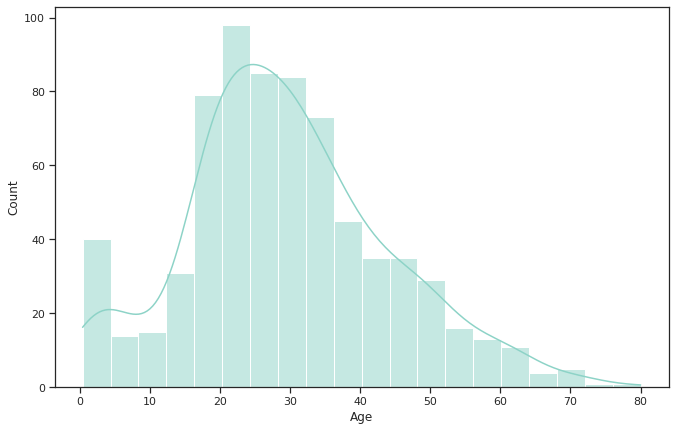

In [ ]:
sns.histplot(titanic_df['Age'], kde=True);

Customise the distribution plot on `Age` so that, instead of the default, the histogram splits the data into 10 bins. Useful to compare the two plots and see how the KDE is relatively stable across different binning choices.

In [ ]:
sns.histplot(titanic_df['Age'], bins=10, kde=True);

In [ ]:
sns.boxplot(x=titanic_df['Age']);

In [ ]:
sns.histplot(titanic_df['Fare'], kde=True);

Now that you have explored some quantitative data, do something similar for **nominal features** (say, `Embarked`, `Pclass`). You will probably need types of plots that are more suitable for categorical data (e.g., bar plots). Feel free to customise `axis` objects (for example, by setting `x` and `y` labels).

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

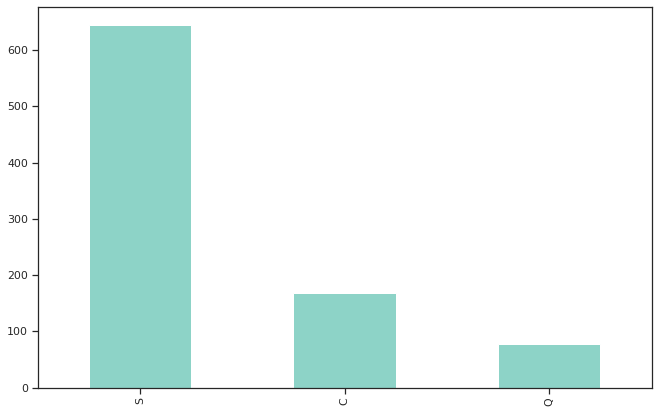

In [ ]:
titanic_df['Embarked'].value_counts().plot.bar();

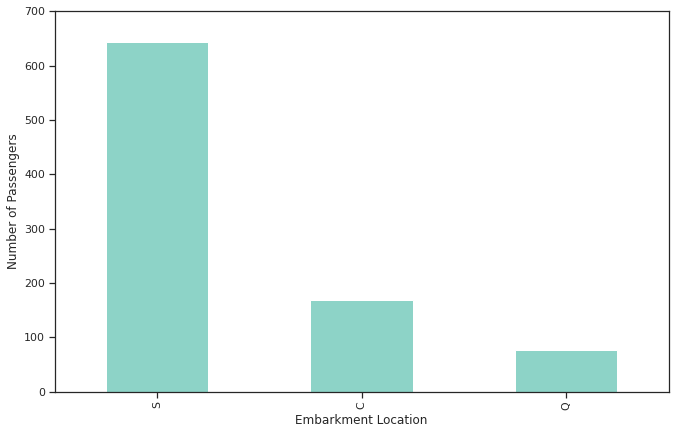

In [ ]:
ax = titanic_df['Embarked'].value_counts().plot.bar()
ax.set_xlabel('Embarkment Location')
ax.set_ylabel('Number of Passengers')
ax.set_ylim(0,700);

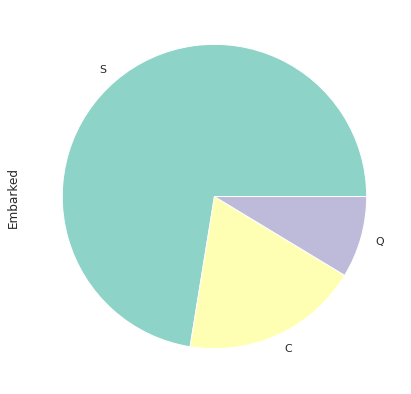

In [ ]:
ax = titanic_df['Embarked'].value_counts().plot.pie()

Use, then, `seaborn`'s alternatives for plotting the frequency distribution of `Embarked`.

In [ ]:
ax = sns.countplot(titanic_df['Embarked'])
ax.set_ylabel('Number of Passengers');

Notice that `Pclass` is a categorical feature - `pandas`, by default, will infer its type from the dataset as a number, and make it `int64`. It is probably useful here to turn it into a `pandas` category; the same would apply to `Survived`.


In [ ]:
sns.countplot(x=titanic_df['Pclass']);

In [ ]:
sns.countplot(titanic_df['Pclass']);

You could now explore some subsets of the data... Let us take a **random, small sample of passengers** that did not travel with parents or children. Then, we should extend that to those that **did not travel with family at all**. It would be interesting to see a **frequency distribution of `Survived`** for that subset of passengers with no parents or children. **How does it compare** to the one for the whole dataset? One can use counts as well as percentages here.

In [ ]:
titanic_df.loc[ titanic_df['Parch']==0 ].sample(5)

In [ ]:
titanic_df.loc[ titanic_df['Parch']==0, 'Survived' ].value_counts().plot.bar();

Could also use **relative**, rather than absolute, frequencies:

In [ ]:
titanic_df.loc[ titanic_df['Parch']==0, 'Survived' ].value_counts(normalize=True)

0    0.656342
1    0.343658
Name: Survived, dtype: float64

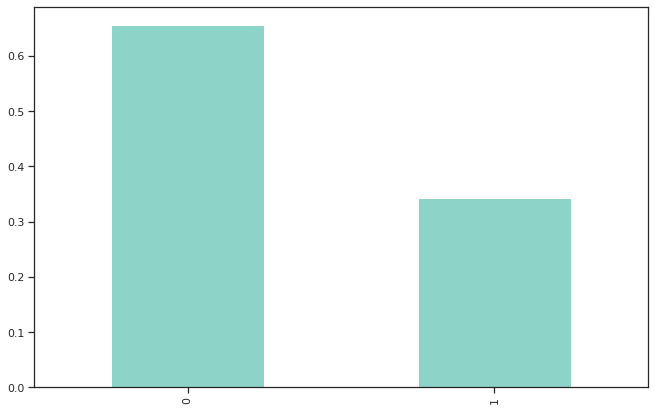

In [ ]:
titanic_df.loc[ titanic_df['Parch']==0, 'Survived' ].value_counts(normalize=True).plot.bar();

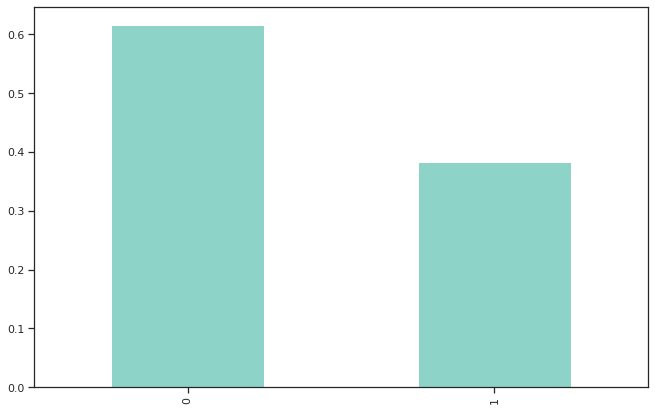

In [ ]:
titanic_df['Survived'].value_counts(normalize=True).plot.bar();

Out of curiosity, was there any passenger with the surname `Cameron`? At this stage, let us simply check that it is part of passenger's name. 

In [ ]:
titanic_df['Name']

In [ ]:
titanic_df['Fare'].round(0)

In [ ]:
titanic_df['Name'].str.lower()

In [ ]:
titanic_df['Name'].str.upper()

In [ ]:
titanic_df['Name'].str.contains('Cameron')

In [ ]:
titanic_df.loc[ titanic_df['Name'].str.contains('Cameron') ]

Oh, and **how many passengers did not travel with family**? And as a **percentage**?

In [ ]:
titanic_df.loc[ (titanic_df['Parch']==0) & (titanic_df['SibSp']==0) ].sample(5)

In [ ]:
len(titanic_df.loc[ (titanic_df['Parch']==0) & (titanic_df['SibSp']==0) ])

In [ ]:
len(titanic_df.loc[ (titanic_df['Parch']==0) & (titanic_df['SibSp']==0) ]) / len(titanic_df) * 100

It would be interesting to find out the **highest fares paid** - say, at the top percentile - and a sample of the **passengers that paid those fares**. How many of them? Show the top 5 payers, just out of curiosity.

In [ ]:
fare_99percentile = titanic_df['Fare'].quantile(0.99)
fare_99percentile

249.00622000000035

In [ ]:
titanic_df.loc[ titanic_df['Fare']>=fare_99percentile ].sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [ ]:
len(titanic_df.loc[ titanic_df['Fare']>=fare_99percentile ])

9

In [ ]:
titanic_df.loc[ titanic_df['Fare']>=fare_99percentile ].sort_values('Fare').head(5)

What is the **`survived` frequency distribution** of those passengers in the **top 5% of fares**? Do we learn anything by comparing it what of those in **bottom 5%**? As with previous examples, you might want to see the numbers as a table as well as in a suitable plot.

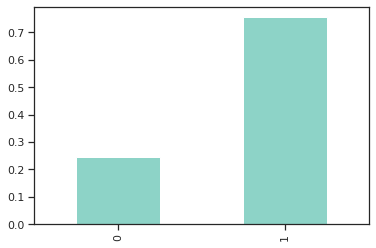

In [ ]:
plt.subplots(figsize=(6,4))
titanic_df.loc[ 
    titanic_df['Fare']>=titanic_df['Fare'].quantile(0.95), 'Survived' 
].value_counts(sort=False, normalize=True).plot.bar();

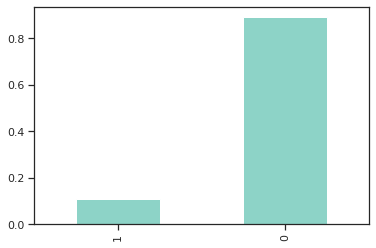

In [ ]:
plt.subplots(figsize=(6,4))
titanic_df.loc[ 
    titanic_df['Fare']<=titanic_df['Fare'].quantile(0.05), 'Survived' 
].value_counts(sort=False, normalize=True).plot.bar();

How many **toddlers** were travelling? Was there any not travelling with their parents? Any with no siblings?

In [ ]:
toddlers_df = titanic_df.loc[ (titanic_df['Age']>=1) & (titanic_df['Age']<=3) ]

In [ ]:
len(toddlers_df)

In [ ]:
toddlers_df.loc[ (toddlers_df['Parch']==0) ]

In [ ]:
toddlers_df.loc[ (toddlers_df['SibSp']==0) ]

Would **age have been a significant factor in survival**? Let us take three slices of 5% of observations - the bottom, the middle, and the top ones - and look at the distribution of `Survived`.

Of the **male passengers** that travelled **first-class**, how many survived and how many died? If we compare that to those in **third-class**, what can we learn?

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

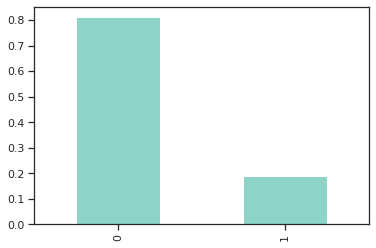

In [ ]:
plt.subplots(figsize=(6,4))
titanic_df.loc[ 
    titanic_df['Sex']=='male', 'Survived' 
].value_counts(sort=False, normalize=True).plot.bar();

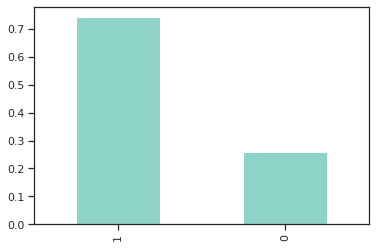

In [ ]:
plt.subplots(figsize=(6,4))
titanic_df.loc[ 
    titanic_df['Sex']=='female', 'Survived' 
].value_counts(sort=False, normalize=True).plot.bar();

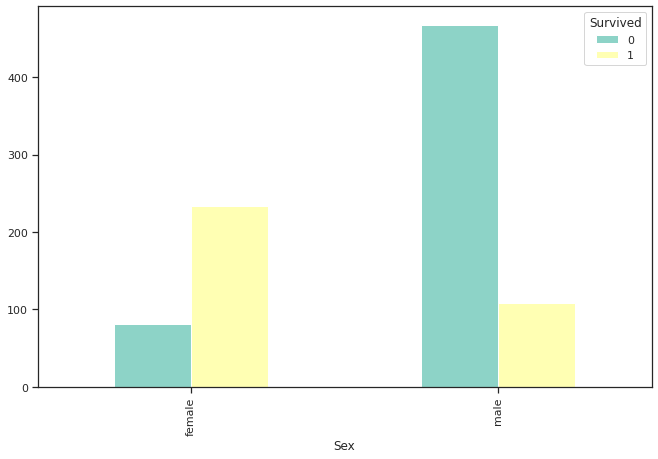

In [ ]:
titanic_df.groupby(['Sex', 'Survived']).size().unstack().plot.bar();